In [97]:
import requests;                                 # import package used to downlaod data from a web URL
import json;
import pandas as pd;
import matplotlib.pyplot as plt;
import matplotlib;
import datetime as dt
import time
import numpy as np

from pandas.io.json import json_normalize

matplotlib.style.use('ggplot');
%matplotlib inline

In [98]:
qualityDict = {0 : 'Normal', 1 : 'Genuine', 2 : 'Unused', 3 : 'Vintage', 4 : 'Unused', 5 : 'Unusual', 6 : 'Unique', 7 : 'Unused', 8 : 'Unused', 9 : 'Keys', 10 : 'Unused', 11 : 'Strange', 12 : 'Unused', 13 : 'Haunted', 14 : 'Collectors', 15 : 'Unused'}

In [99]:
dfIn = pd.read_csv('itemhistoryUSD.csv', dtype={'Craft':str, 'DateTime':dt.datetime, 'DefIndex':np.float64, 'Name':str,
                                            'PriceIndex':str, 'QualInt':np.int64, 'Trade':str, 'currency':str,
                                            'timestamp':np.float64, 'value':np.float64, 'value_high':np.float64})
dfIn['DateTime'] = pd.to_datetime(dfIn['DateTime'])
dfIn = dfIn.set_index(['Name', 'DefIndex', 'QualInt', 'Trade', 'Craft', 'PriceIndex'])
dfIn.sort_index(inplace = True)
df2 = dfIn.reset_index()

In [101]:
item_counts=df2['Name'].value_counts()
#item_counts

In [102]:
count = 0
mostPopular = []
for key, value in item_counts.iteritems():
    if count == 5: #We only want the 5 most common
        break
    mostPopular.append(key)
    count = count + 1

In [103]:
mostPopular

['Earbuds',
 'Team Captain',
 "Villain's Veil",
 "Master's Yellow Belt",
 'Exquisite Rack']

In [104]:
df5 = df2.query("Name in @mostPopular")

In [105]:
#df5.plot(x=df5['DateTime'], y=df5['value'])

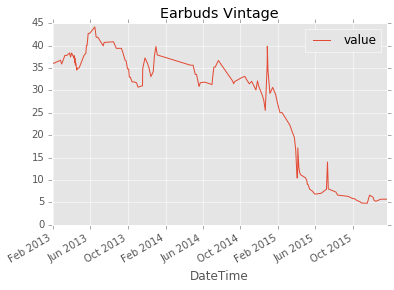

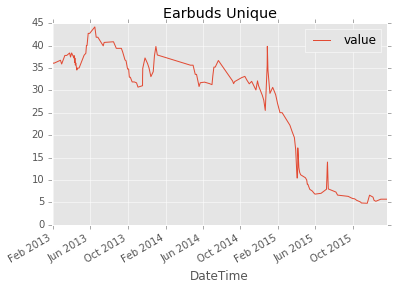

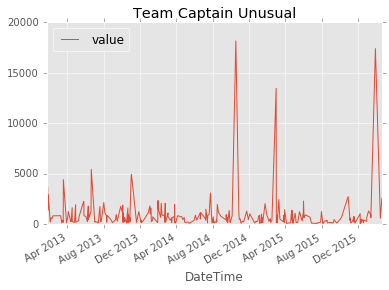

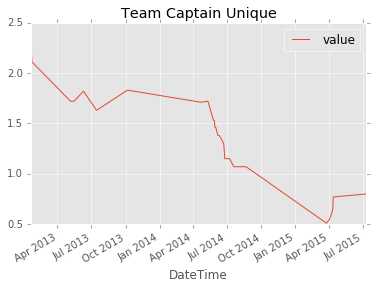

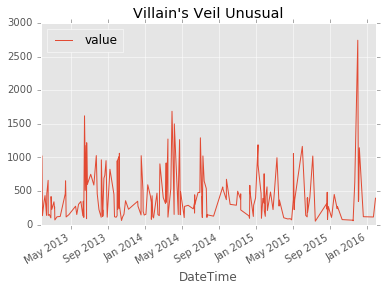

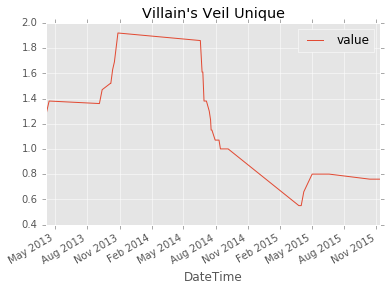

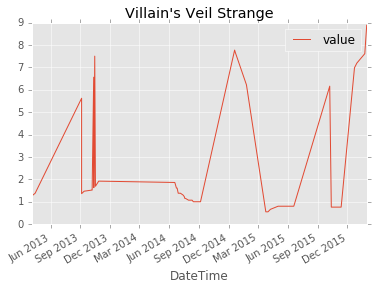

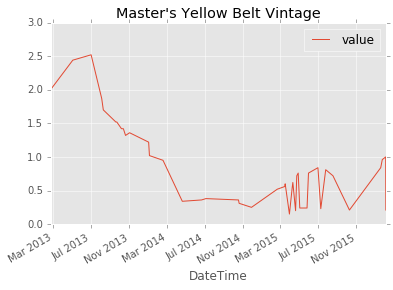

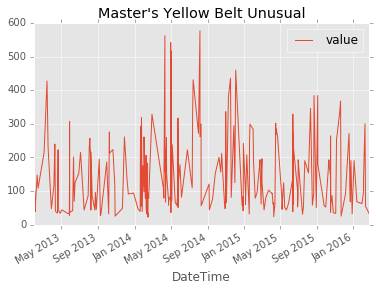

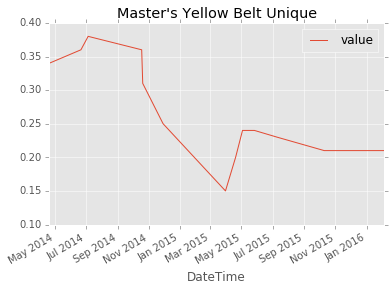

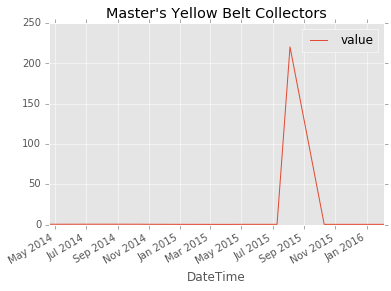

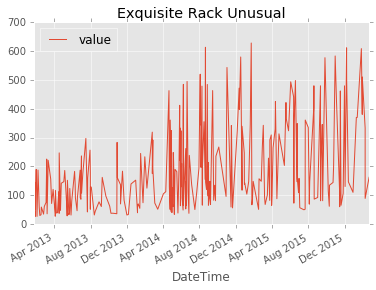

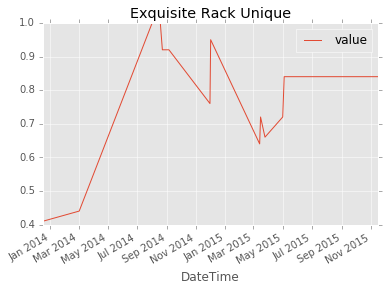

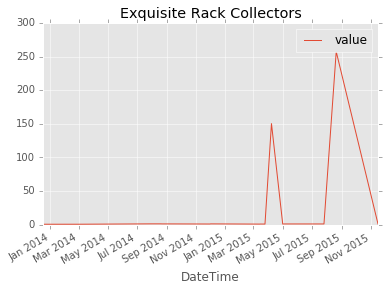

In [106]:
for item in mostPopular:
    plot1 = df5[df5.Name == item]
    plot1Qual = plot1.QualInt.drop_duplicates('last')
    #print item
    for quality in plot1Qual:
        plot2 = plot1[plot1.QualInt == quality]
        #print quality
        qualityString = None
        for key, value in qualityDict.iteritems():
            if (key == quality):
                qualityString = qualityDict[quality]
        titl = item + " " + str(qualityString)
        plot2.plot(x='DateTime',y='value',title=titl)

In [107]:
#df2[df2['QualInt']==13].head(100)

In [108]:
dfHaunt = df2.copy()
dfHaunt = dfHaunt[dfHaunt['QualInt']==13]

In [109]:
haunted_counts = dfHaunt['Name'].value_counts()
#haunted_counts

In [110]:
count = 0
mostPopularHaunted = []
for key, value in haunted_counts.iteritems():
    if count == 5: #We only want the 5 most common
        break
    mostPopularHaunted.append(key)
    count = count + 1

In [111]:
mostPopularHaunted

['Voodoo-Cursed Sniper Soul',
 'Fallen Angel',
 'Haunted Hat',
 'Voodoo-Cursed Demoman Soul',
 'Voodoo-Cursed Pyro Soul']

In [112]:
dfHauntedFilter = df2.query("Name in @mostPopularHaunted")

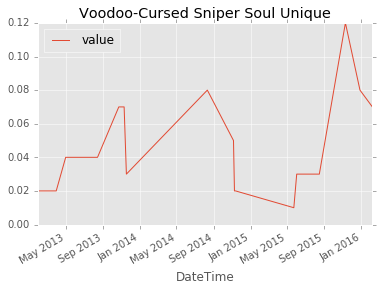

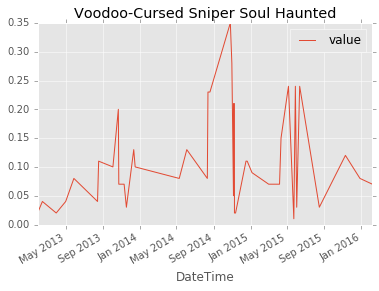

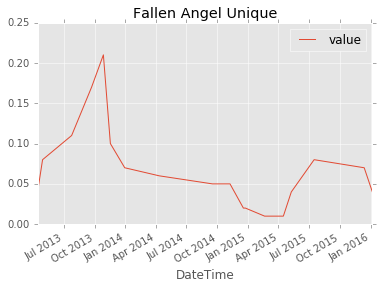

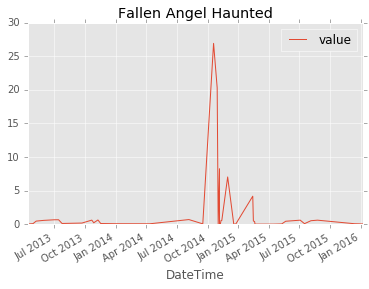

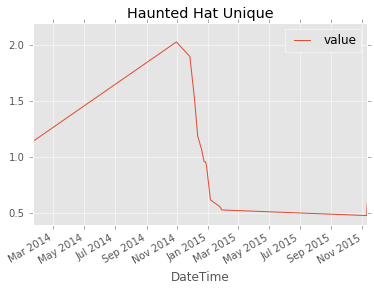

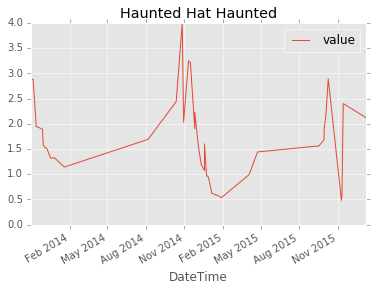

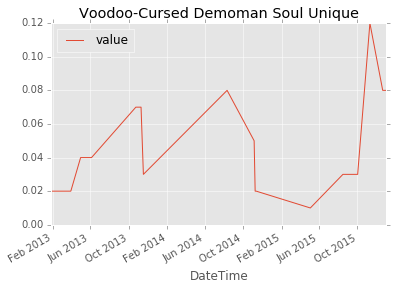

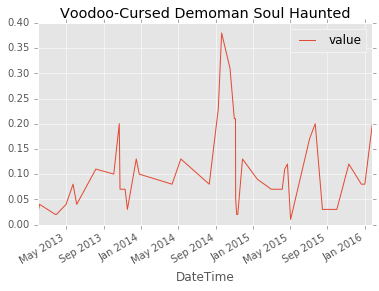

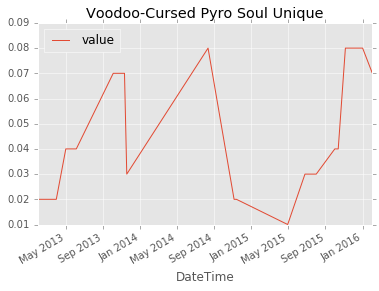

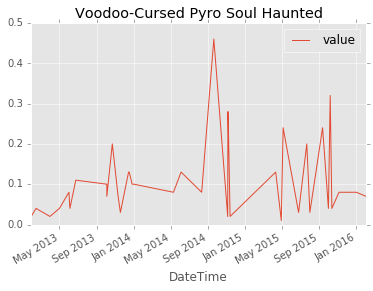

In [118]:
for item in mostPopularHaunted:
    plot1 = dfHauntedFilter[dfHauntedFilter.Name == item]
    plot1Qual = plot1.QualInt.drop_duplicates('last')
    for quality in plot1Qual:
        plot2 = plot1[plot1.QualInt == quality]
        qualityString = None
        for key, value in qualityDict.iteritems():
            if (key == quality):
                qualityString = qualityDict[quality]
        titl = item + " " + str(qualityString)
        plot2.plot(x='DateTime',y='value',title=titl)